In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=None)


In [ ]:
df1 = df['Transactions']
df2 = df['NewCustomerList']
df3 = df['CustomerDemographic']
df4 = df['CustomerAddress']

In [ ]:
df1['product_first_sold_date'] = pd.to_datetime(df1['product_first_sold_date'],origin ='1899-12-30', unit='D')

In [ ]:
df3.drop('default', axis = 1,inplace = True)

In [ ]:
df3['customer_name'] = df3['first_name'] + ' ' + df3['last_name']


In [ ]:
df3.drop(['first_name','last_name'], axis = 1,inplace = True)

In [ ]:
df2['customer_name'] = df2['first_name'] + ' ' + df2['last_name']
df2.drop(['first_name','last_name'], axis = 1,inplace = True)

In [ ]:
df2 = df2.filter(regex='^(?!Unnamed)')

In [ ]:
df_join = pd.merge(pd.merge(df1, df3, on='customer_id'), df4, on='customer_id')


In [ ]:
distinct_values = df_join['gender'].unique()

distinct_values

array(['Male', 'Female', 'U', 'F', 'M', 'Femal'], dtype=object)

In [ ]:
df2['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [ ]:
df2['gender'] = df2['gender'].replace({'U':'Female'})


In [ ]:
replacement_dict = {'F': 'Female', 'Femal': 'Female', 'M': 'Male', 'U': 'Female'}
df_join['gender'] = df_join['gender'].replace(replacement_dict)


In [ ]:
df_features = df_join.drop(['transaction_id','product_id','transaction_date',
               'product_line','product_size','deceased_indicator','customer_name',
               'address','postcode','country','job_title','property_valuation','product_first_sold_date',
               'list_price','standard_cost'], axis = 1)

In [ ]:
df_features['DOB'] = pd.to_datetime(df_features['DOB'])
current_year = pd.to_datetime('today').year
df_features['Age'] = current_year - df_features['DOB'].dt.year
df_features.drop('DOB',axis = 1, inplace = True)

In [ ]:
df_features.head()

,customer_id,online_order,order_status,brand,product_class,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,Age
0,2950,0.0,Approved,Solex,medium,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,68.0
1,2950,0.0,Approved,Giant Bicycles,medium,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,68.0
2,2950,0.0,Approved,Solex,medium,Male,19,Financial Services,Mass Customer,Yes,10.0,VIC,68.0
3,3120,1.0,Approved,Trek Bicycles,medium,Female,89,Health,Mass Customer,Yes,10.0,NSW,44.0
4,3120,0.0,Approved,Giant Bicycles,high,Female,89,Health,Mass Customer,Yes,10.0,NSW,44.0


In [ ]:
df_dataset = df_features.copy()

In [ ]:
df_features.drop(['customer_id','job_industry_category','product_class','brand','tenure','online_order','order_status'], axis = 1,inplace = True)


In [ ]:
df_features = df_features.fillna(0)

In [ ]:
label_encoder = LabelEncoder()

for col in df_features.select_dtypes(include=['object']).columns:
      df_features[col] = label_encoder.fit_transform(df_features[col])


In [ ]:
ms = MinMaxScaler()
df_features_scaled = ms.fit_transform(df_features)

In [ ]:
# scaler = StandardScaler()
# df_features_scaled = scaler.fit_transform(df_features)

In [ ]:
df_features_scaled

array([[1.        , 0.19191919, 1.        , 1.        , 0.75      ,
        0.37777778],
       [1.        , 0.19191919, 1.        , 1.        , 0.75      ,
        0.37777778],
       [1.        , 0.19191919, 1.        , 1.        , 0.75      ,
        0.37777778],
       ...,
       [0.        , 0.66666667, 0.        , 1.        , 0.        ,
        0.17222222],
       [1.        , 0.08080808, 1.        , 0.        , 0.5       ,
        0.31111111],
       [1.        , 0.08080808, 1.        , 0.        , 0.5       ,
        0.31111111]])

In [ ]:
cols = df_features.columns

In [ ]:
df_features_scaled = pd.DataFrame(df_features_scaled, columns=[cols])

In [ ]:
df_features_scaled.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,state,Age
0,1.0,0.191919,1.0,1.0,0.75,0.377778
1,1.0,0.191919,1.0,1.0,0.75,0.377778
2,1.0,0.191919,1.0,1.0,0.75,0.377778
3,0.0,0.898990,1.0,1.0,0.00,0.244444
4,0.0,0.898990,1.0,1.0,0.00,0.244444


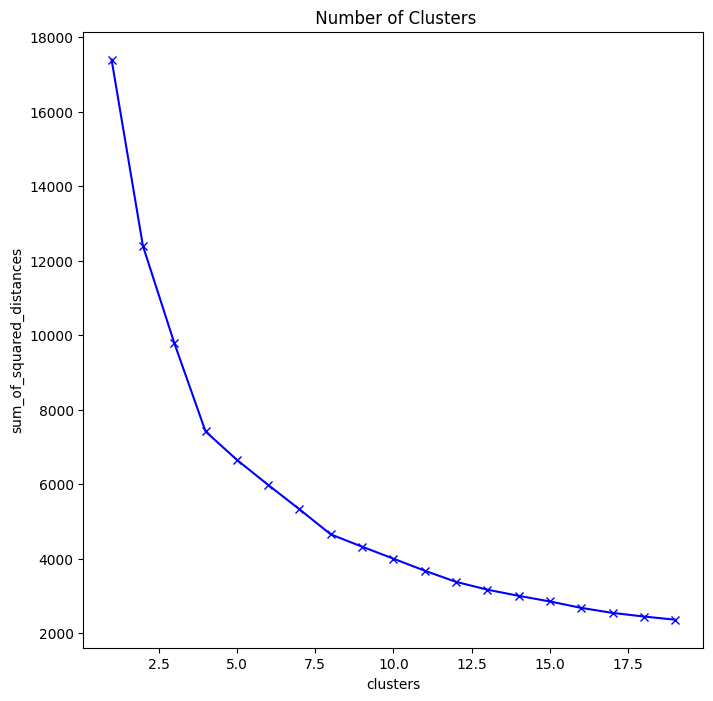

In [ ]:
sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k,max_iter = 600,n_init = 20,random_state =42)
    kmeans.fit(df_features_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

fig = plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('clusters')
plt.ylabel('sum_of_squared_distances')
plt.title(' Number of Clusters')
plt.show()

In [ ]:
kmeans = KMeans( n_clusters = 4, init='k-means++',random_state=0)
kmeans = kmeans.fit(df_features_scaled)
df_dataset['cluster']= kmeans.predict(df_features_scaled)

In [ ]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_features_scaled, kmeans.labels_, metric='euclidean'))


0.3868556812584441


In [ ]:
df2['DOB'] = pd.to_datetime(df2['DOB'])
current_year = pd.to_datetime('today').year
df2['Age'] = current_year - df2['DOB'].dt.year
df2.drop('DOB',axis = 1, inplace = True)

In [ ]:
df2_features = df2[['gender','past_3_years_bike_related_purchases','Age','wealth_segment','owns_car','state']]

In [ ]:
df2_features.head()

,gender,past_3_years_bike_related_purchases,Age,wealth_segment,owns_car,state
0,Male,86,66.0,Mass Customer,Yes,QLD
1,Male,69,53.0,Mass Customer,No,NSW
2,Female,10,49.0,Affluent Customer,No,VIC
3,Female,64,44.0,Affluent Customer,Yes,QLD
4,Female,34,58.0,Affluent Customer,No,NSW


In [ ]:
df2_features = df2_features.fillna(0)

In [ ]:
label_encoder = LabelEncoder()

for col in df2_features.select_dtypes(include=['object']).columns:
      df2_features[col] = label_encoder.fit_transform(df2_features[col])

In [ ]:
df2_features_scaled = ms.fit_transform(df2_features)
cols = df2_features.columns
df2_features_scaled = pd.DataFrame(df2_features_scaled, columns=[cols])

In [ ]:
df2_features_scaled = df2_features_scaled.fillna(0)

In [ ]:
df2['cluster']= kmeans.predict(df2_features_scaled)

In [ ]:
df2.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,customer_name,Age,cluster
0,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,Chickie Brister,66.0,3
1,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,Morly Genery,53.0,3
2,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,Ardelis Forrester,49.0,2
3,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,Lucine Stutt,44.0,2
4,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,Melinda Hadlee,58.0,2


<Axes: xlabel='cluster', ylabel='count'>

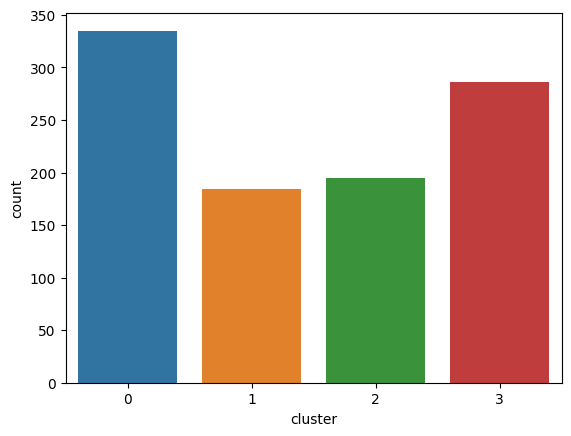

In [ ]:
sns.countplot(x= df2['cluster'] )

<Axes: xlabel='wealth_segment', ylabel='count'>

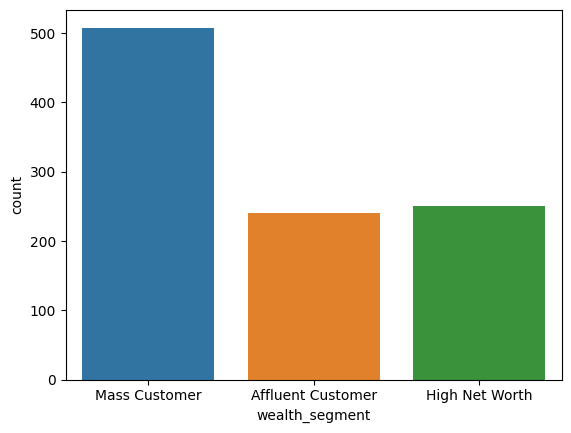

In [ ]:
sns.countplot(x= df2['wealth_segment'] )

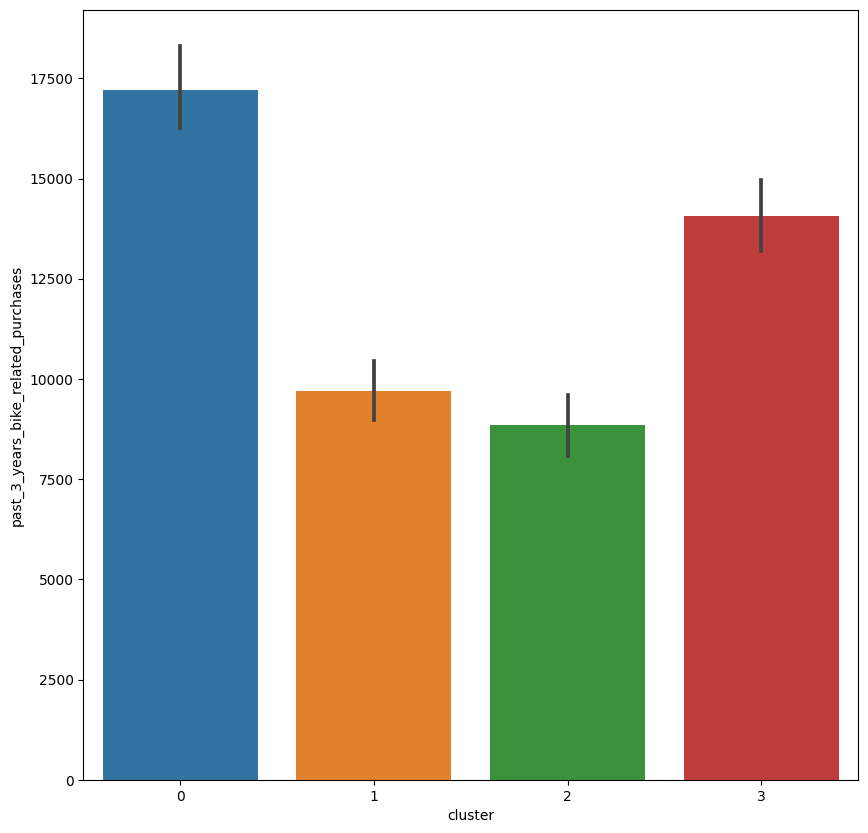

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x ='cluster',
           y ='past_3_years_bike_related_purchases',
           estimator = np.sum,
          data = df2)
plt.show()

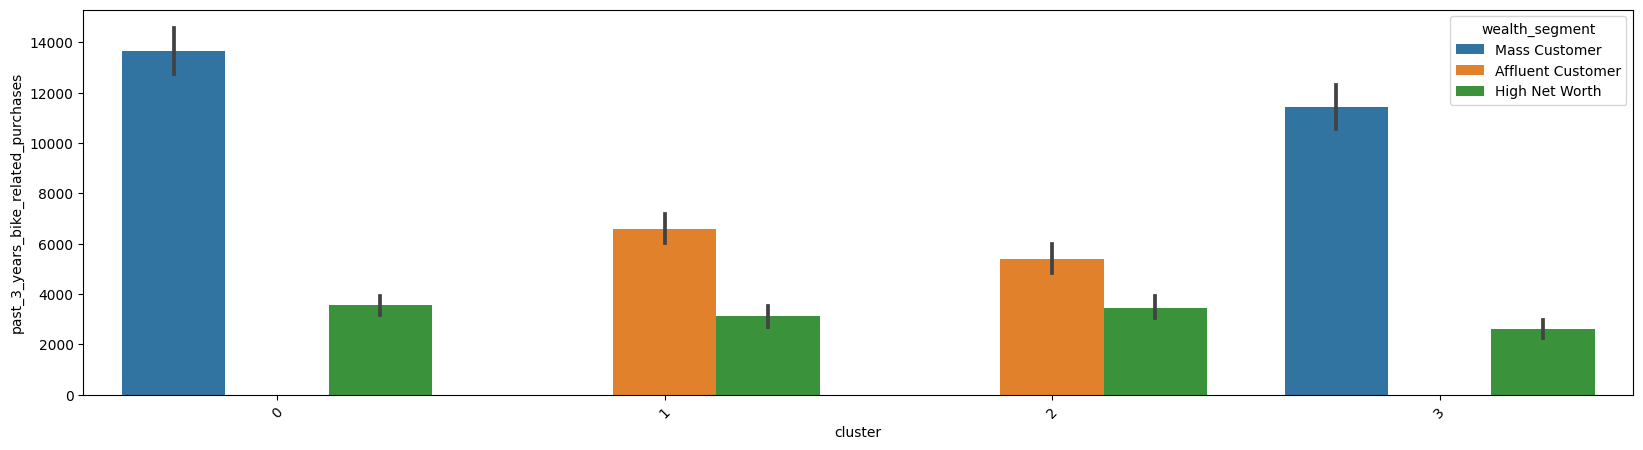

In [ ]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x = 'cluster',
            y = 'past_3_years_bike_related_purchases',
            hue = 'wealth_segment',
            data = df2,
            estimator = np.sum)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#df2.to_csv('/content/drive/My Drive/segments/total_clusters2.csv',index = False)

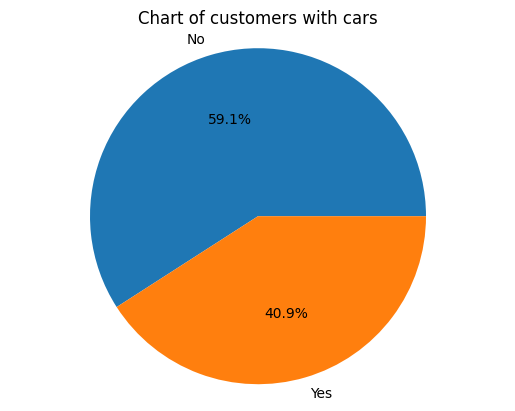

In [ ]:
class_count = cluster_3['owns_car'].value_counts()
plt.pie(class_count.values,labels= class_count.index,autopct = '%1.1f%%')

plt.title('Chart of customers with cars')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()
